In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pynanz as pn
import cvxpy as cp

In [2]:
# Downloading data

tickers = ["AAPL", "USFD", "ARKF", "AIR.PA", "NVDA", "KO", "LMND", "CLOU", "GOOG"]
start = pd.Timestamp("2015-01-01")
threshold_date = start
x = pn.Market()

if not os.path.isfile("data.pkl"):
    x.download(tickers=tickers, start=start, threshold_date=threshold_date)
    x.save("data.pkl")
else:
    x = pn.Market.load("data.pkl")
x.data.head()

AAPL                                              \
                 open       high        low      close  adj close   
Date                                                                
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.745995   
2015-01-05  27.072500  27.162500  26.352501  26.562500  24.048861   
2015-01-06  26.635000  26.857500  26.157499  26.565001  24.051132   
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.388372   
2015-01-08  27.307501  28.037500  27.174999  27.972500  25.325432   

                            AIR.PA                                   ...  \
                 volume       open       high        low      close  ...   
Date                                                                 ...   
2015-01-02  212818400.0  41.540001  41.959999  40.775002  41.525002  ...   
2015-01-05  257142000.0  41.125000  43.200001  41.064999  41.650002  ...   
2015-01-06  263188400.0  41.820000  43.750000  41.680000  42.615002  ...   
2015-01-07  160423600.0  43.000000  44.215000  42.810001  43.724998  ...   
2015-01-08  237458000.0  44.200001  45.500000  43.974998  45.215000  ...   

                   KO                                          GOOG  \
                  low      close  adj close      volume        open   
Date                                                                  
2015-01-02  41.799999  42.139999  33.559841   9921100.0  527.561584   
2015-01-05  42.080002  42.139999  33.559841  26292600.0  521.827332   
2015-01-06  42.240002  42.459999  33.814693  16897500.0  513.589966   
2015-01-07  42.580002  42.990002  34.236778  13412300.0  505.611847   
2015-01-08  43.099998  43.509998  34.650898  21743600.0  496.626526   

                                                                       
                  high         low       close   adj close     volume  
Date                                                                   
2015-01-02  529.815369  522.665039  523.373108  523.373108  1447563.0  
2015-01-05  522.894409  511.655243  512.463013  512.463013  2059840.0  
2015-01-06  514.761719  499.678131  500.585632  500.585632  2899940.0  
2015-01-07  505.855164  498.281952  499.727997  499.727997  2065054.0  
2015-01-08  502.101471  489.655640  501.303680  501.303680  3353582.0  

[5 rows x 30 columns]

In [3]:
price = x.get_price_history(attribute="adj close")
price = price[price.index > pd.Timestamp("2020-01-01")]

In [4]:
mv = pn.MeanVariance(price, sigma_target=0.2, risk_aversion=None, max_weight=0.5, horizon=1, period=30)



In [19]:
%%time
r = mv.meanvariance_optimization(frequency=1, n_workers=16)

/home/salemi/miniconda3/envs/pynanz/lib/python3.8/site-packages/cvxpy/problems/problem.py:1296: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/home/salemi/miniconda3/envs/pynanz/lib/python3.8/site-packages/cvxpy/problems/problem.py:1296: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


CPU times: user 376 ms, sys: 92.8 ms, total: 469 ms
Wall time: 5.48 s


In [10]:
r.iat[3, 4]

0.061

In [11]:
r.head(40)

,AAPL,AIR.PA,NVDA,KO,GOOG,CASH,yearly_return,yearly_risk,risk_aversion
2020-02-14,0.000,0.0,0.467,0.365,0.168,0.000,3.288944,2.000428e-01,8.087158
2020-02-18,0.000,0.0,0.490,0.374,0.136,0.000,3.925996,2.000639e-01,10.986328
2020-02-19,0.000,0.0,0.455,0.500,0.045,0.000,4.619222,2.000602e-01,15.106201
2020-02-20,0.000,0.0,0.439,0.500,0.061,0.000,4.114789,1.999991e-01,12.969971
2020-02-21,0.000,0.0,0.410,0.500,0.058,0.032,3.278047,1.999637e-01,11.072159
2020-02-24,0.000,0.0,0.338,0.500,0.000,0.162,1.859696,2.000382e-01,6.055832
2020-02-25,0.000,0.0,0.314,0.500,0.000,0.186,1.489042,1.999370e-01,3.786087
2020-02-26,0.000,0.0,0.323,0.500,0.000,0.177,1.371608,2.000163e-01,3.366470
2020-02-27,0.000,0.0,0.384,0.000,0.000,0.616,1.128836,2.000820e-01,1.513958
2020-02-28,0.000,0.0,0.360,0.000,0.000,0.640,1.409522,1.999916e-01,4.293919


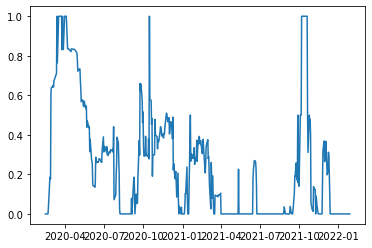

In [12]:
plt.plot(r[r.index > pd.Timestamp("2020-02-01")]["CASH"])